In [1]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from IPython.display import Image
from statistics import mode
from scipy.stats import skew, kurtosis, norm, lognorm, genextreme


# Set the current working directory
os.chdir(sys.path[0])

In [2]:
data = pd.read_csv('/Users/ombadi/Desktop/Mo Files/Teaching/CLIMATE 405/Homework/Ann Arbor_meteorological_2023.csv')

In [4]:
data['TAVG'] = (data['TMAX'] + data['TMIN'])/2

In [14]:
data['T'] = np.nan
data['T'] = np.round((data['TAVG']-32)*(5/9), 1)

In [15]:
data

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN,T
0,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2023-01-01,0.11,40.0,46.0,34.0,4.4
1,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2023-01-02,0.00,39.5,44.0,35.0,4.2
2,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2023-01-03,0.45,41.0,43.0,39.0,5.0
3,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2023-01-04,0.17,47.5,58.0,37.0,8.6
4,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2023-01-05,0.04,36.0,40.0,32.0,2.2
...,...,...,...,...,...,...,...,...
360,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2023-12-27,0.05,45.5,49.0,42.0,7.5
361,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2023-12-28,0.18,41.5,44.0,39.0,5.3
362,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2023-12-29,0.07,39.0,41.0,37.0,3.9
363,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2023-12-30,0.01,34.0,40.0,28.0,1.1


(array([ 3.,  3., 11., 47., 73., 48., 32., 52., 69., 26.]),
 array([-15.3 , -11.21,  -7.12,  -3.03,   1.06,   5.15,   9.24,  13.33,
         17.42,  21.51,  25.6 ]),
 <BarContainer object of 10 artists>)

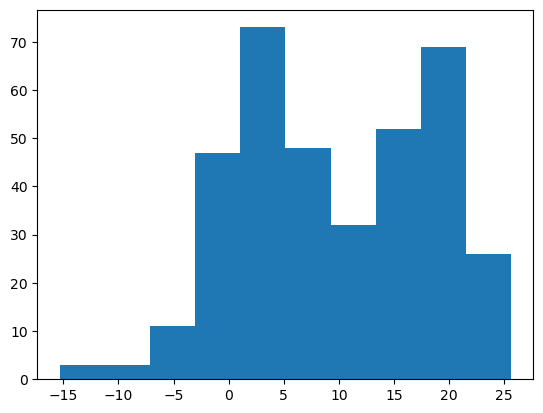

In [16]:
plt.hist(data['T'])

In [21]:
np.nansum(data['T']<15)

231

In [20]:
np.nansum(data['T']>15)

130

In [17]:
data.to_csv('/Users/ombadi/Desktop/Mo Files/Teaching/CLIMATE 405/Homework/Ann-Arbor-Temp.csv')

## Q1

In [23]:
n = [100, 1000, 10000, 100000]

for i in range(len(n)):

    x = np.random.normal(0, 1, n[i])
    print(kurtosis(x))

-0.2539908978087353
-0.07190898160419223
0.03254445970965447
0.011739201375708053


### Q2

In [41]:
data = pd.read_csv('/Users/ombadi/Desktop/Mo Files/Teaching/CLIMATE 405/Homework/Ann-Arbor-Temp.csv')

In [42]:
pred = data['T'][:-1].values
obs = data['T'][1:].values

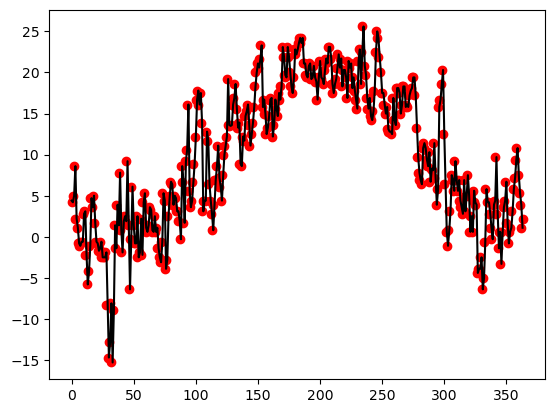

In [43]:
plt.plot(np.arange(len(obs)), obs, 'ro', np.arange(len(pred)), pred, '-k')

In [46]:
np.mean((obs - pred)**2)

9.889615384615386

In [47]:
np.sqrt(np.mean((obs - pred)**2))

3.1447758878202094

In [48]:
np.mean(abs(obs - pred))

2.364285714285714

In [49]:
np.mean(obs-pred)

-0.006043956043956042

In [50]:
np.mean(obs-pred) / np.mean(obs)

-0.0006220312146573171

In [51]:
np.corrcoef(obs,pred)[0,1]

0.9330884725991082